In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


##### Step 1: Define Paths and Parameters

In [2]:
train_dir = os.path.join('Dataset', 'images.cv_jzk6llhf18tm3k0kyttxz', 'data', 'train')
test_dir = os.path.join('Dataset', 'images.cv_jzk6llhf18tm3k0kyttxz', 'data', 'test')
val_dir = os.path.join('Dataset', 'images.cv_jzk6llhf18tm3k0kyttxz', 'data', 'val')

In [3]:
# Define image size
img_height, img_width = 224, 224

# Define batch size
batch_size = 32

##### Step 2: Create Data Generators

In [4]:
# For training: apply data augmentation and rescaling.

train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0, 1]
    rotation_range=20,        # Random rotations up to 20 degrees
    zoom_range=0.2,           # Random zoom in/out
    horizontal_flip=True,     # Random horizontal flip
    width_shift_range=0.1,    # Random horizontal shifts
    height_shift_range=0.1    # Random vertical shifts
)

In [5]:
# For validation and test sets: only rescaling.

val_test_datagen = ImageDataGenerator(rescale=1./255)

##### Step 3: Load Images from Directories

In [6]:
# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 6225 images belonging to 11 classes.


In [7]:
# Validation generator
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1092 images belonging to 11 classes.


In [8]:
# Test generator
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3187 images belonging to 11 classes.


##### Step 4: Inspect the Loaded Data

In [9]:
print("Train Class Indices:", train_generator.class_indices)
print("Validation Class Indices:", val_generator.class_indices)
print("Test Class Indices:", test_generator.class_indices)

Train Class Indices: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}
Validation Class Indices: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}
Test Class Indices: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food 

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
class_count = len(train_generator.class_indices)
class_count

11

##### Build a Deeper CNN Model from scratch.

In [12]:
model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Block 4 - Additional convolutional block for deeper learning
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(class_count, activation='softmax')
])

c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Print model summary to inspect the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 26,874,411 (102.52 MB)

 Trainable params: 26,871,467 (102.51 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [15]:
# Define Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [16]:
# Train the Model with Early Stopping
epochs = 20

history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, validation_data=val_generator, validation_steps=val_generator.samples // batch_size, epochs=epochs, callbacks=[early_stopping])

c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 2077s 10s/step - accuracy: 0.4928 - f1_score: 0.4144 - loss: 1.6583 - precision: 0.6336 - recall: 0.3817 - val_accuracy: 0.1581 - val_f1_score: 0.0366 - val_loss: 14.3205 - val_precision: 0.1603 - val_recall: 0.1581
Epoch 2/20
  1/194 ━━━━━━━━━━━━━━━━━━━━ 24:10 8s/step - accuracy: 0.6875 - f1_score: 0.5938 - loss: 0.8678 - precision: 0.7692 - recall: 0.6250

c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


194/194 ━━━━━━━━━━━━━━━━━━━━ 68s 316ms/step - accuracy: 0.6875 - f1_score: 0.5938 - loss: 0.8678 - precision: 0.7692 - recall: 0.6250 - val_accuracy: 0.1535 - val_f1_score: 0.0323 - val_loss: 14.7770 - val_precision: 0.1559 - val_recall: 0.1535
Epoch 3/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 1497s 8s/step - accuracy: 0.7028 - f1_score: 0.6160 - loss: 0.8745 - precision: 0.7644 - recall: 0.6394 - val_accuracy: 0.4007 - val_f1_score: 0.2692 - val_loss: 4.8364 - val_precision: 0.4114 - val_recall: 0.3925
Epoch 4/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 73s 286ms/step - accuracy: 0.9062 - f1_score: 0.8287 - loss: 0.2772 - precision: 0.9643 - recall: 0.8438 - val_accuracy: 0.4062 - val_f1_score: 0.2739 - val_loss: 4.7854 - val_precision: 0.4166 - val_recall: 0.3971
Epoch 5/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 1535s 8s/step - accuracy: 0.8293 - f1_score: 0.7509 - loss: 0.5122 - precision: 0.8589 - recall: 0.8016 - val_accuracy: 0.4256 - val_f1_score: 0.2923 - val_loss: 3.0205 - val_precision: 0.4354 - val_recall:

In [18]:
test_loss, test_accuracy, *other_metrics = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

99/99 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9539 - f1_score: 0.4519 - loss: 0.1692 - precision: 0.9608 - recall: 0.9436
Test Accuracy: 94.67%


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=list(test_generator.class_indices.keys())))
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred, labels=list(test_generator.class_indices.values())))

100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step
Classification Report
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.98      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.95      0.91      0.93       298
   fish sea_food gilt_head_bream       0.94      0.95      0.95       305
   fish sea_food hourse_mackerel       0.92      1.00      0.96       286
        fish sea_food red_mullet       0.96      1.00      0.98       291
     fish sea_food red_sea_bream       0.95      0.94      0.94       273
          fish sea_food sea_bass       1.00      0.83      0.90       327
            fish sea_food shrimp       1.00      0.91      0.95       289
fish sea_food striped_red_mullet       0.81      0.99      0.89       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy              

c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

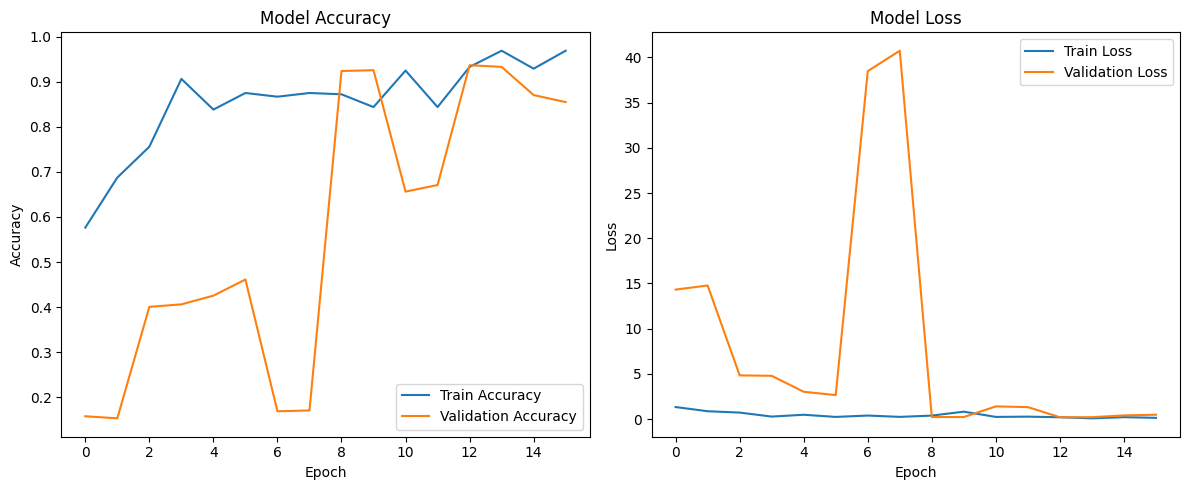

In [21]:
# Visualize Training History

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

##### Experiment with five pre-trained models (e.g., VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0).

##### Fine-tune the pre-trained models on the fish dataset